In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from domain.kinematics import calculate_trajectory
from model.chromosome import Chromosome
import os, random, json

# Análise

## Read Log

In [1]:
log = json.loads(open('../log.json').read())

NameError: name 'json' is not defined

## Real x Alvo

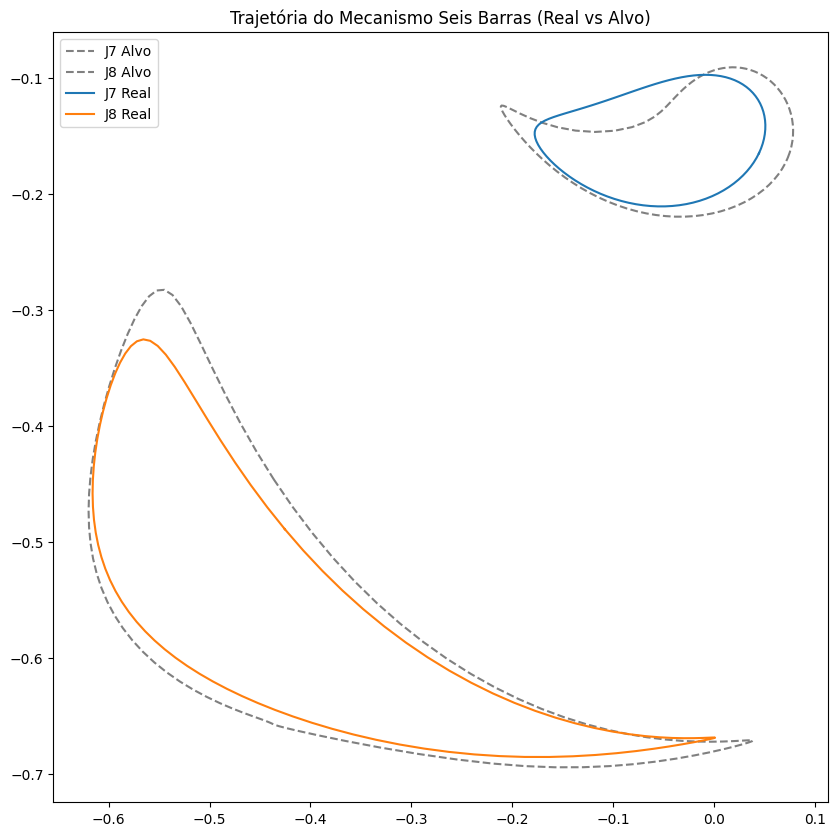

In [12]:
J7_target = np.array(log['target_trajectory'])[:,:2]
J8_target = np.array(log['target_trajectory'])[:,2:4]
J7 = np.array(log['best_chromosome_trajectory'])[:,:2]
J8 = np.array(log['best_chromosome_trajectory'])[:,2:4]

plt.figure(figsize=(10,10))
plt.plot(J7_target[:,0], J7_target[:,1], '--', label='J7 Alvo', markersize=4, color='grey')
plt.plot(J8_target[:,0], J8_target[:,1], '--', label='J8 Alvo', markersize=4, color='grey')
plt.plot(J7[:,0], J7[:,1], '-', label='J7 Real', markersize=4)
plt.plot(J8[:,0], J8[:,1], '-', label='J8 Real', markersize=4)
plt.title('Trajetória do Mecanismo Seis Barras (Real vs Alvo)')
plt.legend()
plt.show()

## Fitness x Gerações

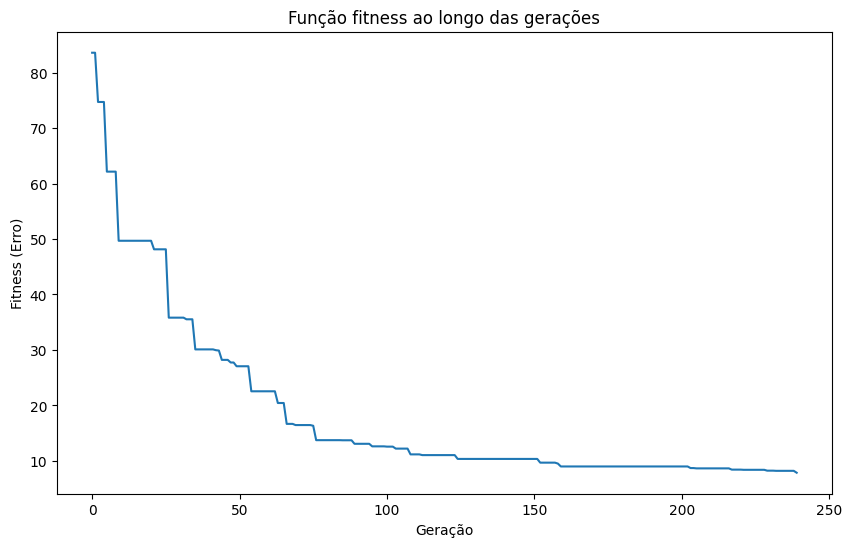

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(log['fitness_history'])
plt.title('Função fitness ao longo das gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness (Erro)')
plt.show()

# Inicializar 

In [14]:
traj = calculate_trajectory(c, return_all=True)
traj

NameError: name 'c' is not defined

In [ ]:
point = random.choice(traj)

In [ ]:
scalar = 1

J1, J2, J3, J4, J5, J6, J7, J8 = (point[0], point[1]), (point[2], point[3]), (point[4], point[5]), (point[6], point[7]), (point[8], point[9]), (point[10], point[11]), (point[12], point[13]), (point[14], point[15])

# startup file
s = f'''<linkage2>
	<program zoom="400.000000" xoffset="-6" yoffset="0" scalefactor="1.000000" units="Millimeters" backgroundtransparency="0.000000" backgroundscale="1.000000" xgrid="" ygrid=""/>'''

for n, J in enumerate([J1,J2,J3,J4,J5,J6,J7,J8]):
	if J in [J3, J1, J5]:
		print('anchor')
		anchor_condition = "true"
	else:
		anchor_condition = "false"
	s += f'''
	<connector id="{n}" selected="false" layer="16" x="{J[0]*scalar}" y="{J[1]*scalar}" anchor="{anchor_condition}" color="16711680" usercolor="false" name="J{n+1}"/> '''
	if J == J1: # input
		s = s.replace('/>', ' input="true" rpm="15.000000" />')
s = s + '''
	<Link id="0" selected="false" layer="16" linesize="1" shapetype="hull" color="16711680" usercolor="false">
		<connector id="0"/>
	</Link>'''

# links
for a,b in [(5,6),(6,8),(8,7),(6,7),(3,2),(2,7),(2,4),(4,7),(1,4)]:
	s += f'''
	<Link id="{a*10+b}" selected="false" layer="16" linesize="1" shapetype="line" color="16711680" usercolor="false">
		<connector id="{a-1}"/>
		<connector id="{b-1}"/>
	</Link>'''
 
s += '''
	<selected>
	</selected>
	<background></background>
</linkage2>'''

if True:
	with open('4bar.linkage2', 'w') as f:
		f.write(s)
	os.system('taskkill /IM Linkage.exe /F')
	os.startfile('4bar.linkage2')

NameError: name 'point' is not defined